<a href="https://colab.research.google.com/github/ifkmldk/portfolio/blob/main/KALBE_Case_Study(fail).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6c1745aacfc1d2b84c5919da905dabd3159835b9e4586075a44b7ce2e389cc61
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1


In [4]:
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('/content/KALBE Case Study.xlsx', sheet_name = 'join', engine='openpyxl')
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-6-227f7976a7a4>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,CustomerID_2,Age,...,ProductID_2,Product Name,Price.1,PriceCheck,StoreID_2,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,328,36,...,P3,Crackers,7500,True,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,165,44,...,P9,Yoghurt,10000,True,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,183,27,...,P1,Choco Bar,8800,True,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,160,48,...,P1,Choco Bar,8800,True,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,386,33,...,P9,Yoghurt,10000,True,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3,243,38,...,P10,Cheese Stick,15000,True,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9,271,29,...,P2,Ginger Candy,3200,True,9,Lingga,Lingga,Modern Trade,-3.654703,128.190643
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9,52,37,...,P7,Coffee Candy,9400,True,9,Lingga,Lingga,Modern Trade,-3.654703,128.190643
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13,18,47,...,P8,Oat,16000,True,13,Buana,Buana,General Trade,-1.269160,116.825264


In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("KALBE_Case Study.html")

In [8]:
df.info()
print('\nCount of Missing Value')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   CustomerID_2    5020 non-null   int64         
 9   Age             5020 non-null   int64         
 10  Gender          5020 non-null   int64         
 11  Gender_2        5020 non-null   object        
 12  Marital Status  4976 non-null   object        
 13  Income          5020 non-null   float64       
 14  Income(Jt)      5020 non-null   int64         
 15  Prod

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price              0
Qty                0
TotalAmount        0
StoreID            0
CustomerID_2       0
Age                0
Gender             0
Gender_2           0
Marital Status    44
Income             0
Income(Jt)         0
ProductID_2        0
Product Name       0
Price.1            0
PriceCheck         0
StoreID_2          0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
dtype: int64

In [13]:
customer_agg = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [14]:
customer_agg

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_agg)

In [17]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
cluster_labels = kmeans.labels_

In [20]:
customer_agg['Cluster'] = cluster_labels
customer_agg

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,1
1,2,13,57,392300,1
2,3,15,56,446200,1
3,4,10,46,302500,0
4,5,7,27,268600,2
...,...,...,...,...,...
442,443,16,59,485100,1
443,444,18,62,577700,1
444,445,18,68,587200,1
445,446,11,42,423300,0


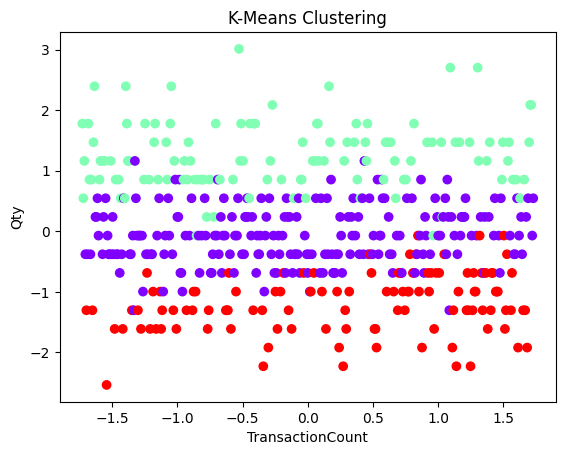

In [21]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('TransactionCount')
plt.ylabel('Qty')
plt.title('K-Means Clustering')
plt.show()